# Statistics and Trends
## Applied Data Science 1
### MSc Data Science (with placement year)
#### University of Hertfordshire
**Author:** Cristina Baron Suarez <br>
**Student ID:** 23069038 <br>
**Email:** [cb24ack@herts.ac.uk](mailto:cb24ack@herts.ac.uk)  <br>[Github repository](https://github.com/criss-bassu/Statistics_Trends.git))


Labourers from Malaga (Spain) and Tanger (Morocco) were asked to get a blood test in order to carry out a study. It was noted that the workers' energy intake habits were notably different between both cities. Labourers from Malaga presented a caloric intake that the researcher, a Moroccan doctor, considered excesive, especially when comparing the meals proportions served at the restaurants in Malaga to the family meals frequently shared in Morocco. The researcher's hypothesis suggests that these food differences could be reflected in the blood test results and the BMI.

The dataset has been provided by the research team from the Faculty of Health Sciences at the University of Malaga.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [100]:
# Reading CSV
df = pd.read_csv('comparingDietBlood.csv', sep = ';')

# Convert 'Height' from object to float, replacing ',' with '.'
df['Height'] = df['Height'].str.replace(',', '.').astype(float) # 'Height' into float

# Calculate the BMI rounded to 2 decimals
df['BMI'] = (df['Weight'] / ((df['Height']/100) ** 2)).round(2)

# We will not be using the following columns for the research
df = df.drop(['Systolic BP', 'Diastolic BP', 'Height', 'Weight'], axis = 1)
df.head()

,Group,Cholesterol,Triglycerides,Glucose,Energy Intake,Exercise,BMI
0,Malaga,238,107,89,3521,1400,290437.09
1,Tanger,251,163,90,1490,1730,304779.66
2,Malaga,194,73,89,3701,2180,273356.40
3,Tanger,169,71,65,3200,2150,262507.25
4,Malaga,227,114,121,4124,1700,304052.93


We use descriptive statistics, as well as skewness and kurtosis, to observe the differences between Malaga and Tanger.

In [12]:
# We create an extended version of the describe function in order to add the skewness and the kurtosis
def describe_extended(data):
    skewness = data.skew().round(2) # Calculates the skewness of each column. Returns only 2 decimals.
    kurtosis = data.kurtosis().round(2) # Calculates the kurtosis of each column. Returns only 2 decimals.
    
    # Transposes the DataFrames for 'skewness' and 'kurtosis', converting columns into rows
    # Renames the index of the first row to identify each metric
    skewness_df = pd.DataFrame(skewness).T.rename(index = {0: 'skewness'})
    kurtosis_df = pd.DataFrame(kurtosis).T.rename(index = {0: 'kurtosis'})
    
    # Concatenates the new DatFrames to 'describe' (which return only 2 decimals)
    return pd.concat([data.describe().round(2), skewness_df, kurtosis_df])

In [16]:
df_group = df.groupby('Group')

# Applies the function to each group
dg = df_group.apply(describe_extended)
dg

Cholesterol  Triglycerides  Glucose  Energy Intake  Exercise  \
Group                                                                           
Malaga count           50.00          50.00    50.00          50.00     50.00   
       mean           209.12         113.22    88.18        3528.04   1880.30   
       std             42.42          69.89    19.03         550.94    438.12   
       min            102.00          38.00    48.00        2470.00   1090.00   
       25%            184.25          66.50    78.50        3179.25   1553.50   
       50%            203.00          95.00    84.00        3538.50   1895.00   
       75%            238.00         134.25    90.00        3802.25   2178.75   
       max            335.00         351.00   159.00        4900.00   2910.00   
       skewness         0.33           1.81     2.02           0.29      0.12   
       kurtosis         1.05           3.75     6.21          -0.29     -0.33   
Tanger count           30.00          30.00    30.00          30.00     30.00   
       mean           162.67          82.13    78.03        1909.17   1894.20   
       std             44.81          45.18    11.27         469.75    185.89   
       min             82.00          38.00    65.00        1452.00   1430.00   
       25%            136.25          57.00    71.00        1590.00   1782.50   
       50%            164.50          70.00    75.00        1805.00   1865.00   
       75%            196.75          93.25    82.00        1987.50   2008.75   
       max            251.00         271.00   115.00        3500.00   2258.00   
       skewness         0.09           2.81     1.43           2.16      0.06   
       kurtosis        -0.53          10.26     2.70           5.01      0.23   

                       BMI  
Group                       
Malaga count         50.00  
       mean      283600.80  
       std        31263.44  
       min       217993.08  
       25%       263069.34  
       50%       278913.92  
       75%       300115.24  
       max       366498.21  
       skewness       0.80  
       kurtosis       1.34  
Tanger count         30.00  
       mean      250498.59  
       std        25863.28  
       min       208085.61  
       25%       234528.29  
       50%       250346.96  
       75%       262113.62  
       max       318877.55  
       skewness       0.66  
       kurtosis       0.77

Next, we will explore the distribution of energy intake in both groups using histograms.

In [102]:
def plot_histogram(df, groups):
    # Creates two plots, next to each other, that share both axes
    fig, axes = plt.subplots(nrows = 1, ncols = len(groups), figsize = (10, 4), sharex = True, sharey = True, layout = 'constrained')

    for i, group in enumerate(groups):
        # Gets a dataframe with the rows of the group being studied
        dg = df[df['Group'] == group]
        
        # For the rows obtained previously, select the 'Energy Intake' column and divide the data in 20 bins
        axes[i].hist(dg.loc[:, 'Energy Intake'], bins = 20, color = '#FFB347', edgecolor = 'black', alpha = 1)
        axes[i].set_title(group, fontsize = 14)
        axes[i].grid(True)
        axes[i].tick_params(axis = 'both', labelsize = 14) # Changes the size of the ticks in both axis

    fig.supxlabel('Energy Intake (Kcal)', fontsize = 14)
    fig.supylabel('Count', fontsize = 14)
    plt.show()
    return

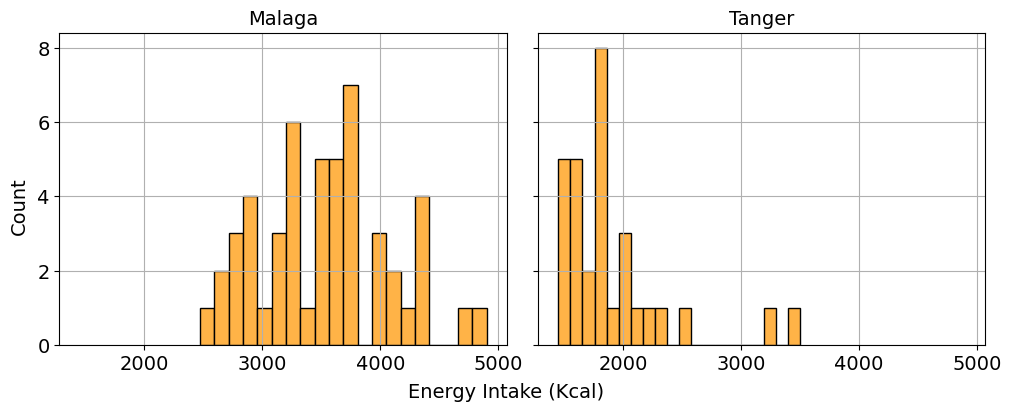

In [104]:
groups = df['Group'].unique() # Gets all the groups
plot_histogram(df, groups)

The histograms reveal a wider distribution of energy intake values in Malaga; whereas in Tanger there are fewer instances reaching higher energy intake levels. Therefore, we can conclude that the energy intake of Tanger is clearly lower.

Using boxplot, we will compare the energy intake and cholesterol levels between the two
groups. The values mentioned below are approximations.

In [106]:
def boxplots(df, groups):
    plt.figure(dpi = 144)
    
    # Gets actual axis
    ax1 = plt.gca()
    
    # Boxplots for 'Energy Intake'
    energyIntake = [df[df['Group'] == group]['Energy Intake'] for group in groups] # Gets the Energy Intake data for each group
                    
    bp1 = ax1.boxplot(energyIntake,
                      positions = [x - 0.2 for x in range(1, len(groups) + 1)], # Determines the location
                      widths = 0.3, # Determines the location
                      patch_artist = True,
                      boxprops = dict(facecolor = 'none', edgecolor = 'blue'), # Draws the border of the box in blue
                      medianprops = dict(color = 'darkblue')) # Properties of the line marking the median
    
    ax1.set_ylabel('Energy Intake (Kcal)', color = 'blue', fontsize = 14) # Properties of Y1
    ax1.tick_params(axis = 'y', labelcolor = 'blue', labelsize = 14) # Properties of Y1
    
    # Boxplots for 'Cholesterol'
    ax2 = ax1.twinx() # Shares axis X
    cholesterol = [df[df['Group'] == group]['Cholesterol'] for group in groups] # Gets the Cholesterol data for each group
                    
    bp2 = ax2.boxplot(cholesterol,
                      positions = [x + 0.2 for x in range(1, len(groups) + 1)], # Determines the location
                      widths = 0.3, # Determines the width
                      patch_artist = True,
                      boxprops = dict(facecolor = 'none', edgecolor = 'darkorange'), # Draws the border of the box in dark orange
                      medianprops = dict(color = 'red')) # properties of the line marking the median
    
    ax2.set_ylabel('Cholesterol (mg/dL)', color = 'darkorange', fontsize = 14) # Properties of Y2
    ax2.tick_params(axis = 'y', labelcolor = 'darkorange', labelsize = 14) # Properties of Y2
    
    # Sets the names of the groups in the X axis
    plt.xticks(range(1, len(groups) + 1), groups, fontsize = 14)
    plt.title('Energy Intake VS Cholesterol', fontsize = 16)
    
    plt.show()
    return

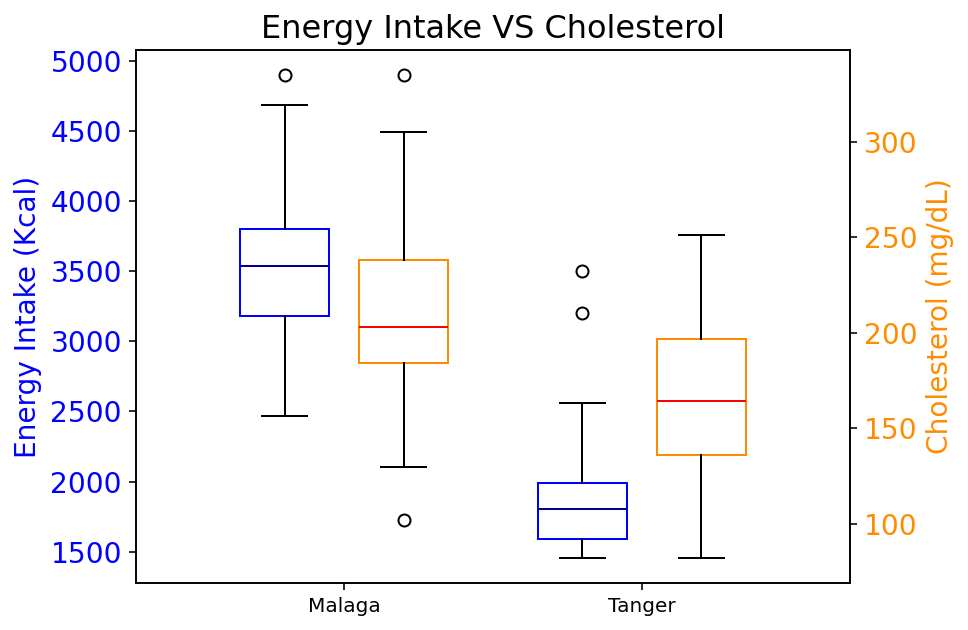

In [108]:
boxplots(df, groups)

In Malaga, the median energy intake is 3500 
Kcal, with an IQR that ranges from 2500 t 
4600 Kcal. On the other hand, in Tanger, t e
median is almost 2000 Kcal, with an IQR of
1500 to 2500 Kcal. Speaking of choleste ol,
Malaga’s median level is almost 250 m /dL,
with an IQR that ranges from 175  o 240
mg/dL, and a range of 130 to 300 mg/dL.
Furthermore, there are o

However, in Tanger, the median cholesterol is 170 mg/dL with a narrower IQR of 140 to 
200 mg/dL, extending from 90 to 250 mg/dL, with no outliers.utliers.

Because of this, we may think that there is an association between energy intake and Cholesterol that would explain the differences between Malaga and Tanger. To explore that, we make a scatter plot.

In [110]:
def plot_regresion(df, groups):
    # Creates the figure and the axes
    fig, ax = plt.subplots(dpi = 144, figsize = (8, 6))

    for group in groups:
        # Gets a dataframe with the rows that belong to the group being studied
        dg = df[df['Group'] == group]
        
        # Generates a scatter plot comparing the cholesterol against the energy intake for the group being studied
        ax.scatter(dg['Energy Intake'], dg['Cholesterol'], marker = 'o', s = 10, label = group)

        # Sets a linear regression line (degree 1) to the data
        # Saves the results in the coefficients of the equation of the line
        m, b = np.polyfit(dg['Energy Intake'], dg['Cholesterol'], 1)
        
        # Draws a line in the graph given the axes X and the equation of the line
        ax.plot(dg['Energy Intake'], m * dg['Energy Intake'] + b, label = f'Regresion {group}')

    ax.grid(True)
    ax.set_xlabel('Energy Intake (Kcal)', fontsize = 14)
    ax.set_ylabel('Cholesterol (mg/dL)', fontsize = 14)
    ax.tick_params(labelsize = 14)
    ax.legend(fontsize = 12)

    plt.show()
    return

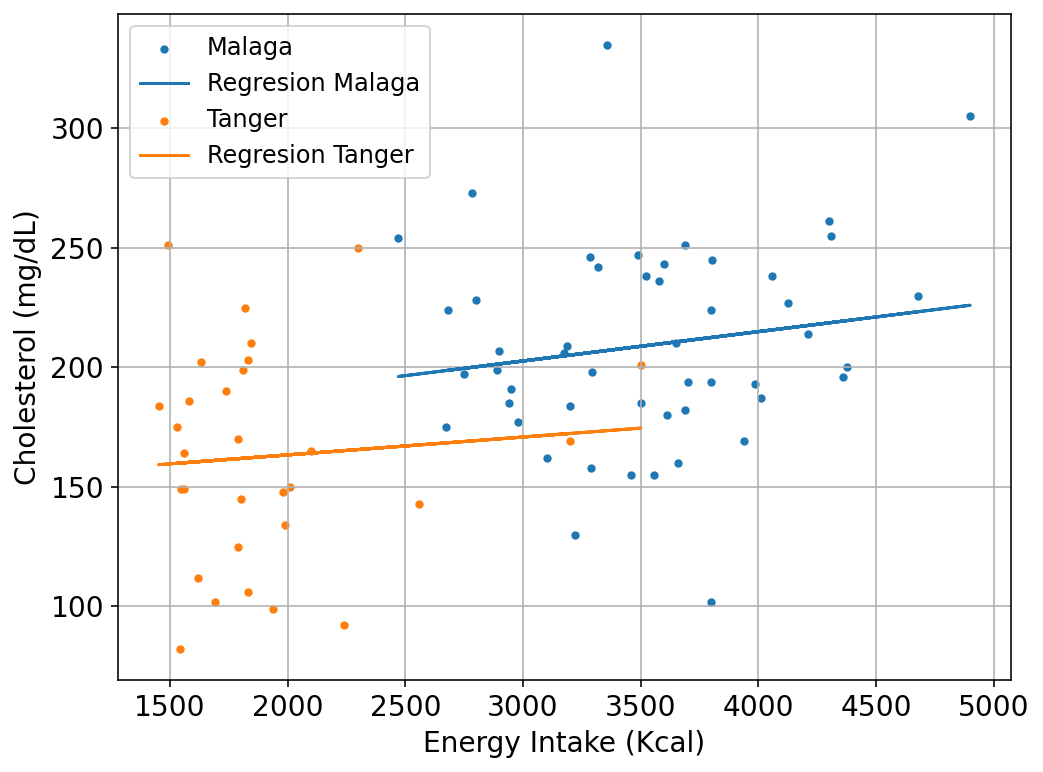

In [112]:
plot_regresion(df, groups)

Apparently, a higher energy intake is associated with an increase in choresterol levels: Both regressions lines have a positive slope and are almost parallel, but at different levels. This means that large difference in energy intake will not explain on its own the reasons behind the differences in cholesterol levels between Malaga and Tanger. That is to say, there must be other reasons that should be studied.

A variable that might counteract the effect of energy intake is exercise (measured in kilocalories). Next, we will explore the degree of linear association between all numerical variables by displaying the Pearson correlation matrix for every possible pair.

In [118]:
def heatmap(corr_matrix):
    fig, ax = plt.subplots(dpi = 144)

    # Mask for the upper triangle of the heatmap
    mask = np.triu(np.ones_like(corr_matrix))
    
    sns.heatmap(corr_matrix,
                ax = ax,
                vmin = -1, # Minimum value
                vmax = 1, # Maximum value
                cmap = 'RdBu', # Red-Blue colormap
                annot = True, # Display values in each cell
                mask = mask) # Hiding upper triangle
    
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.show()
    return

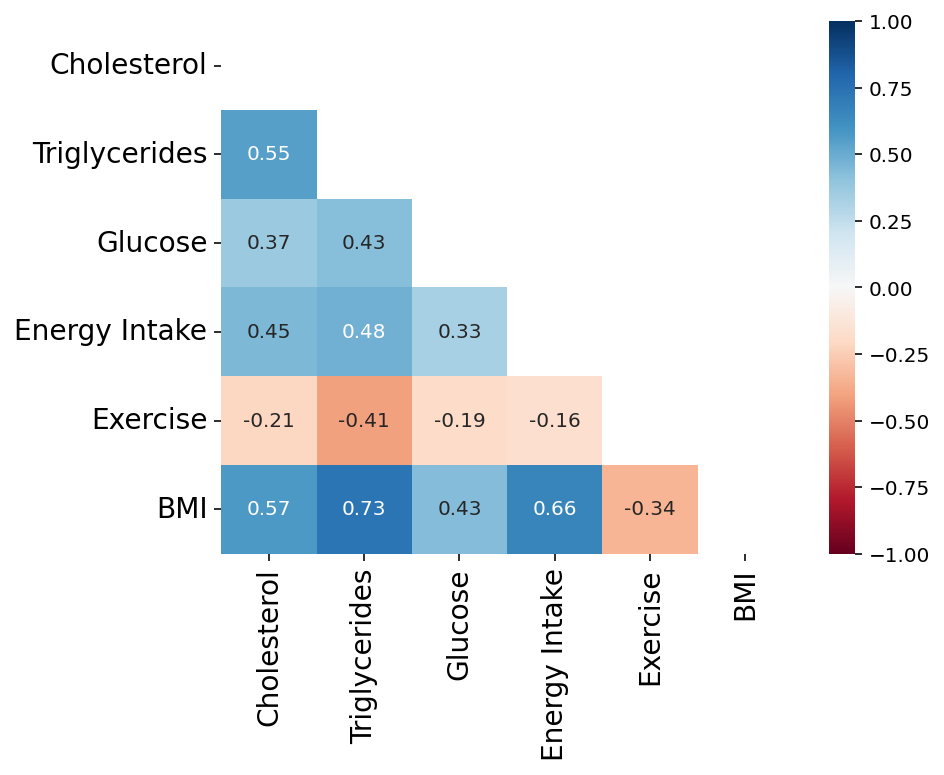

In [120]:
corr_matrix = df.drop(columns = ['Group']).corr(method = 'pearson') # The Group column does not have numerical values
heatmap(corr_matrix)

Now we can see how the energy intake is directly correlated with cholesterol, triglycerides, glucose, and, especially, the BMI. In contrast, the exercise is inversily correlated with these variables, although weaklier.